<a href="https://colab.research.google.com/github/jgumtau/cohort-15-data-science/blob/main/housing-prices-project-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title

## 1. Problem Definition


[link text](https://)The goal is to take data regarding homes in 2006-2010 and predict how much houses with similar features will cost in the following years based on this data. This is classified as a regression problem due to the target value being a number.

## 2. Data Collection/Sources


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

from sklearn.impute import SimpleImputer

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler

### 2a. Create and analyze DataFrame

In [27]:
url = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv'
df_orig = pd.read_csv(url)

In [ ]:
df_orig.shape

(2637, 81)

In [ ]:
df_orig.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000


Determine the target

In [ ]:
target = df_orig['SalePrice'].copy()
target.head()

,SalePrice
0,115400
1,90000
2,141000
3,254000
4,155000


In [ ]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Frontage     2188 non-null   float64
 4   Lot Area         2637 non-null   int64  
 5   Street           2637 non-null   object 
 6   Alley            180 non-null    object 
 7   Lot Shape        2637 non-null   object 
 8   Land Contour     2637 non-null   object 
 9   Utilities        2637 non-null   object 
 10  Lot Config       2637 non-null   object 
 11  Land Slope       2637 non-null   object 
 12  Neighborhood     2637 non-null   object 
 13  Condition 1      2637 non-null   object 
 14  Condition 2      2637 non-null   object 
 15  Bldg Type        2637 non-null   object 
 16  House Style      2637 non-null   object 
 17  Overall Qual  

In [ ]:
df_orig.isnull().sum().sort_values(ascending=False)

,0
Pool QC,2626
Misc Feature,2541
Alley,2457
Fence,2109
Mas Vnr Type,1607
...,...
Central Air,0
Electrical,0
1st Flr SF,0
2nd Flr SF,0


### 2b. Determining data distinctions

split data into categorical and numerical data.

In [ ]:
categorical_data = df_orig.select_dtypes(include=['object', 'category']).columns.tolist()
print(f'Categorical columns {categorical_data}')
numerical_data = df_orig.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f'Numerical columns {numerical_data}')

Categorical columns ['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature', 'Sale Type', 'Sale Condition']
Numerical columns ['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen 

### 2c.
Assess unique values

In [ ]:
for col in categorical_data:
    print(f'Unique Values in column {col}: {df_orig[col].unique()}')

Unique Values in column MS Zoning: ['RL' 'RM' 'FV' 'C (all)' 'RH' 'I (all)' 'A (agr)']
Unique Values in column Street: ['Pave' 'Grvl']
Unique Values in column Alley: [nan 'Pave' 'Grvl']
Unique Values in column Lot Shape: ['Reg' 'IR1' 'IR2' 'IR3']
Unique Values in column Land Contour: ['Lvl' 'Bnk' 'HLS' 'Low']
Unique Values in column Utilities: ['AllPub' 'NoSewr' 'NoSeWa']
Unique Values in column Lot Config: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Unique Values in column Land Slope: ['Gtl' 'Mod' 'Sev']
Unique Values in column Neighborhood: ['Sawyer' 'IDOTRR' 'Somerst' 'SWISU' 'CollgCr' 'Edwards' 'OldTown'
 'Mitchel' 'NridgHt' 'ClearCr' 'NWAmes' 'Gilbert' 'NoRidge' 'NAmes'
 'Timber' 'MeadowV' 'StoneBr' 'Blmngtn' 'SawyerW' 'Crawfor' 'Veenker'
 'BrkSide' 'GrnHill' 'BrDale' 'NPkVill' 'Greens' 'Blueste' 'Landmrk']
Unique Values in column Condition 1: ['Feedr' 'Norm' 'PosA' 'RRAn' 'PosN' 'Artery' 'RRNn' 'RRAe' 'RRNe']
Unique Values in column Condition 2: ['Norm' 'RRNn' 'Feedr' 'RRAe' 'Arter

In [ ]:
# Print value counts and percentages for each categorical column
for col in categorical_data:
    print(f"\nColumn: {col}")
    print(df_orig[col].value_counts(normalize=True) * 100)


Column: MS Zoning
MS Zoning
RL         77.474403
RM         15.889268
FV          4.664391
C (all)     0.948047
RH          0.872203
I (all)     0.075844
A (agr)     0.075844
Name: proportion, dtype: float64

Column: Street
Street
Pave    99.544937
Grvl     0.455063
Name: proportion, dtype: float64

Column: Alley
Alley
Grvl    61.666667
Pave    38.333333
Name: proportion, dtype: float64

Column: Lot Shape
Lot Shape
Reg    63.026166
IR1    33.940083
IR2     2.464922
IR3     0.568828
Name: proportion, dtype: float64

Column: Land Contour
Land Contour
Lvl    89.685248
HLS     4.209329
Bnk     4.019719
Low     2.085703
Name: proportion, dtype: float64

Column: Utilities
Utilities
AllPub    99.886234
NoSewr     0.075844
NoSeWa     0.037922
Name: proportion, dtype: float64

Column: Lot Config
Lot Config
Inside     72.961699
Corner     17.406143
CulDSac     6.067501
FR2         3.071672
FR3         0.492984
Name: proportion, dtype: float64

Column: Land Slope
Land Slope
Gtl    95.221843
Mod 

Examine and make warnings addressing excessive amounts of unique data, and point out where the data is imbalanced.

In [ ]:
# Examine categorical variables
for col in categorical_data:
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {len(df_orig[col].unique())}")
    print(f"Most common values:")
    print(df_orig[col].value_counts(normalize=True).head())

    # Check if the column has too many unique values
    if len(df_orig[col]) > 50:
        print(f"Warning: {col} has more than 50 unique values")

    # Check if the column is highly imbalanced
    if df_orig[col].value_counts(normalize=True).max() > 0.95:
        print(f"Warning: {col} is highly imbalanced")


Column: MS Zoning
Number of unique values: 7
Most common values:
MS Zoning
RL         0.774744
RM         0.158893
FV         0.046644
C (all)    0.009480
RH         0.008722
Name: proportion, dtype: float64

Column: Street
Number of unique values: 2
Most common values:
Street
Pave    0.995449
Grvl    0.004551
Name: proportion, dtype: float64

Column: Alley
Number of unique values: 3
Most common values:
Alley
Grvl    0.616667
Pave    0.383333
Name: proportion, dtype: float64

Column: Lot Shape
Number of unique values: 4
Most common values:
Lot Shape
Reg    0.630262
IR1    0.339401
IR2    0.024649
IR3    0.005688
Name: proportion, dtype: float64

Column: Land Contour
Number of unique values: 4
Most common values:
Land Contour
Lvl    0.896852
HLS    0.042093
Bnk    0.040197
Low    0.020857
Name: proportion, dtype: float64

Column: Utilities
Number of unique values: 3
Most common values:
Utilities
AllPub    0.998862
NoSewr    0.000758
NoSeWa    0.000379
Name: proportion, dtype: float64



## 3. Data Cleaning


let's isolate the floats, as they are easiest to work with in this scenario.

In [ ]:
# Get the names of the float columns
float_columns = df_orig.select_dtypes(include=['float64']).columns

# Select the float columns from df_1
df_float = df_orig[float_columns]

df_float_1 = df_float.copy()

df_float_1.describe()

,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Yr Blt,Garage Cars,Garage Area
count,2188.000000,2614.000000,2636.000000,2636.000000,2636.000000,2636.000000,2635.000000,2635.000000,2490.000000,2636.000000,2636.000000
mean,69.166819,101.887911,438.441199,51.068665,555.669196,1045.179059,0.432258,0.058824,1978.185944,1.763278,470.968134
std,23.356779,179.578232,449.602326,172.521803,436.223188,429.686089,0.525239,0.240130,25.452647,0.760576,212.816905
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,0.000000,0.000000
25%,58.000000,0.000000,0.000000,0.000000,218.000000,792.000000,0.000000,0.000000,1961.000000,1.000000,324.750000
50%,68.000000,0.000000,368.000000,0.000000,464.500000,988.000000,0.000000,0.000000,1979.000000,2.000000,480.000000
75%,80.000000,164.000000,732.000000,0.000000,797.250000,1290.250000,1.000000,0.000000,2002.000000,2.000000,576.000000
max,313.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,3.000000,2.000000,2207.000000,5.000000,1488.000000


Check for null/missing values

In [ ]:
print(df_float_1.isnull().sum())

Lot Frontage      449
Mas Vnr Area       23
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Yr Blt     147
Garage Cars         1
Garage Area         1
dtype: int64


We'll be dropping Lot Frontage because it has a lot of null/missing values.

In [ ]:
# remove 'Lot Frontage' Column
df_float_1.drop(columns=['Lot Frontage'], inplace=True)

# check for missing values
print(df_float_1.isnull().sum())

Mas Vnr Area       23
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Yr Blt     147
Garage Cars         1
Garage Area         1
dtype: int64


Let's use imputation to replace the rest of the nulls with the mean value for their respective columns.

In [ ]:
imp = SimpleImputer(missing_values = np.nan , strategy='mean')
imp.fit(df_float_1)
df_float_1 = pd.DataFrame(data=imp.transform(df_float_1), columns=df_float_1.columns)
df_float_1.describe()

,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Yr Blt,Garage Cars,Garage Area
count,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000
mean,101.887911,438.441199,51.068665,555.669196,1045.179059,0.432258,0.058824,1978.185944,1.763278,470.968134
std,178.793075,449.517037,172.489076,436.140437,429.604578,0.525040,0.240039,24.732767,0.760432,212.776534
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,218.000000,792.000000,0.000000,0.000000,1962.000000,1.000000,325.000000
50%,0.000000,368.000000,0.000000,465.000000,988.000000,0.000000,0.000000,1978.185944,2.000000,480.000000
75%,162.000000,732.000000,0.000000,797.000000,1290.000000,1.000000,0.000000,2001.000000,2.000000,576.000000
max,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,3.000000,2.000000,2207.000000,5.000000,1488.000000


Check for nulls one more time.

In [ ]:
df_float_1.isnull().sum()

,0
Mas Vnr Area,0
BsmtFin SF 1,0
BsmtFin SF 2,0
Bsmt Unf SF,0
Total Bsmt SF,0
Bsmt Full Bath,0
Bsmt Half Bath,0
Garage Yr Blt,0
Garage Cars,0
Garage Area,0


In [ ]:
df_float_1.head()

,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Yr Blt,Garage Cars,Garage Area
0,0.0,513.0,144.0,348.0,1005.0,1.0,0.0,1964.0,2.0,440.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1967.0,2.0,516.0
2,0.0,0.0,0.0,780.0,780.0,0.0,0.0,1979.0,1.0,544.0
3,0.0,484.0,0.0,491.0,975.0,1.0,0.0,2000.0,2.0,592.0
4,0.0,350.0,210.0,0.0,560.0,1.0,0.0,1971.0,2.0,576.0


In [ ]:
features_for_corr = df_float_1.copy()

preparing cleaned feature data for feature correlation

In [ ]:
# Ensure SalePrice is in df_orig
if 'SalePrice' not in df_orig:
    print("SalePrice not found in df_orig. Please check your data.")
else:
    # Concatenate df_float_1 with SalePrice
    features_for_corr['SalePrice'] = df_orig['SalePrice']

# Print the shape of the updated dataframe
print(f"Shape of df_float_1 after adding SalePrice: {features_for_corr.shape}")

# Print the columns of df_float_1
print("Columns in features_for_corr")
print(features_for_corr.columns)

Shape of df_float_1 after adding SalePrice: (2637, 11)
Columns in features_for_corr
Index(['Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Yr Blt',
       'Garage Cars', 'Garage Area', 'SalePrice'],
      dtype='object')


## 4. Exploratory Data Analysis


### 4a. Feature Correlation

i still need to work on this. (the correlation plot shebang.) - 10/21/24

Top 5 features correlated with SalePrice:
SalePrice         1.000000
Garage Cars       0.647207
Garage Area       0.633883
Total Bsmt SF     0.628470
Garage Yr Blt     0.512310
Mas Vnr Area      0.503488
BsmtFin SF 1      0.427674
Bsmt Full Bath    0.277146
Bsmt Unf SF       0.174573
Bsmt Half Bath    0.042454
Name: SalePrice, dtype: float64


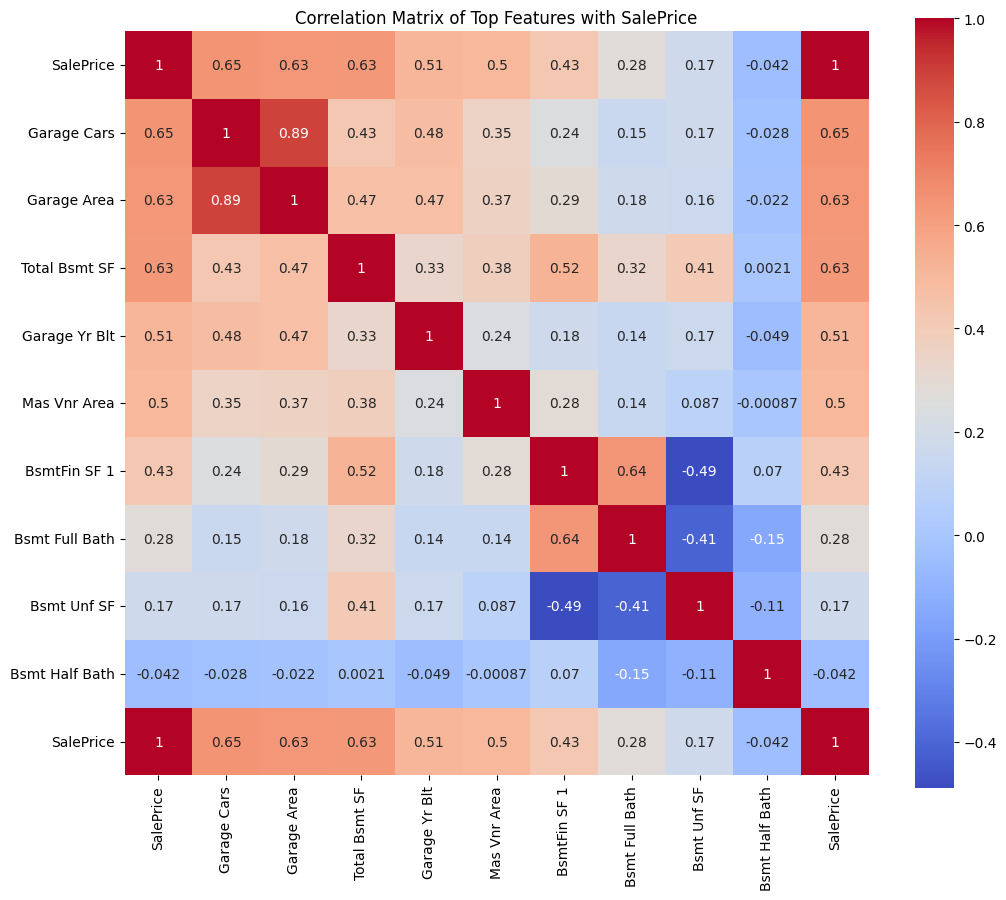

In [ ]:
# Calculate correlation matrix
corr_matrix = features_for_corr.corr()

# Extract correlations with SalePrice
saleprice_corr = corr_matrix['SalePrice'].abs().sort_values(ascending=False)

# Print the top 10 most correlated features with SalePrice
print("Top 5 features correlated with SalePrice:")
print(saleprice_corr.head(10))

# Create a heatmap of the top 10 correlated features
top_features = saleprice_corr.index[:10].tolist()
top_features.append('SalePrice')

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix.loc[top_features, top_features], annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Top Features with SalePrice')
plt.show()

### 4b. Feature Selection based on correlation

In [ ]:
# Print the top 10 most correlated features with SalePrice
print("Top 10 features correlated with SalePrice:")
print(saleprice_corr.head(11))

Top 10 features correlated with SalePrice:
SalePrice         1.000000
Garage Cars       0.647207
Garage Area       0.633883
Total Bsmt SF     0.628470
Garage Yr Blt     0.512310
Mas Vnr Area      0.503488
BsmtFin SF 1      0.427674
Bsmt Full Bath    0.277146
Bsmt Unf SF       0.174573
Bsmt Half Bath    0.042454
BsmtFin SF 2      0.009326
Name: SalePrice, dtype: float64


In [ ]:
# Select features with correlation > 0.5
selected_features = saleprice_corr[saleprice_corr > 0.5].index.tolist()

In [ ]:
# Remove 'SalePrice' from the list if it exists
if 'SalePrice' in selected_features:
    selected_features.remove('SalePrice')

# Print selected features
print("\nSelected features (correlation > 0.5):")
print(selected_features)


Selected features (correlation > 0.5):
['Garage Cars', 'Garage Area', 'Total Bsmt SF', 'Garage Yr Blt', 'Mas Vnr Area']


In [ ]:
# Create a new dataframe with selected features
corr_features = features_for_corr[selected_features].copy()

In [ ]:
# Print the shape of the new dataframe
print(f"\nShape of selected features dataframe: {corr_features.shape}")


Shape of selected features dataframe: (2637, 5)


## 5. Data Preperation

### 5a1. Data Preperation

In [28]:
# Print the shape of features and target
print(f"Features shape: {corr_features.shape}")
print(f"Target shape: {target.shape}")

Features shape: (2637, 5)
Target shape: (2637,)


these form your x and ys?

#### Splitting Training and Testing datasets

In [30]:
# Data Preparation
X_train, X_test, y_train, y_test = train_test_split(corr_features, target, test_size=0.2, random_state=42)

In [31]:
# Print the shapes of the split data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2109, 5)
X_test shape: (528, 5)
y_train shape: (2109,)
y_test shape: (528,)


#### Feature Scaling for corr_features

In [32]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 5a. Ridge Modeling

Root Mean Squared Error (RMSE): $48960.63
Root Mean Squared Percentage Error (RMSPE): 3.38%
R-squared: 0.6528


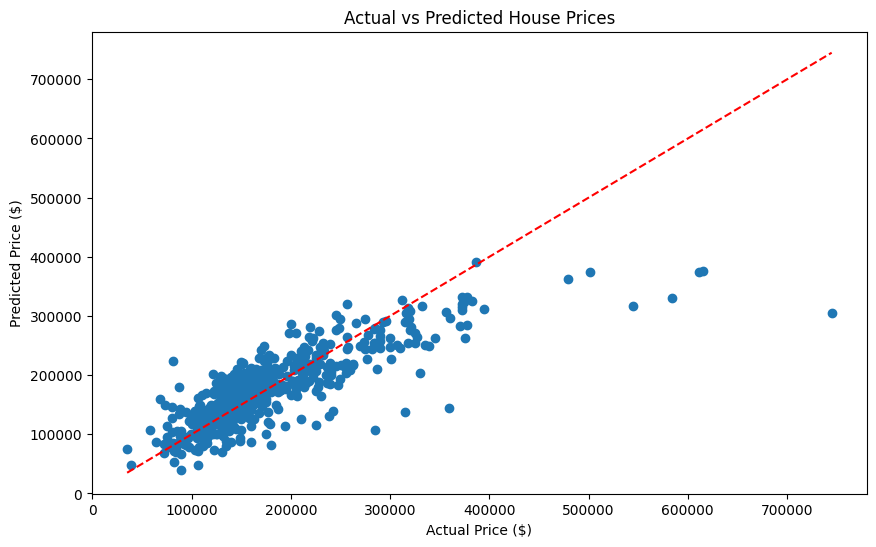

In [33]:
# Model Creation and Evaluation
# Use Ridge regression with a small alpha value to add some regularization
model = Ridge(alpha=0.1)
model.fit(X_train_scaled, y_train)

# Make predictions
predictions = model.predict(X_test_scaled)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")

rmspe = np.sqrt(np.mean((predictions - y_test) / y_test)**2) * 100
print(f"Root Mean Squared Percentage Error (RMSPE): {rmspe:.2f}%")

r2 = model.score(X_test_scaled, y_test)
print(f"R-squared: {r2:.4f}")

# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Actual vs Predicted House Prices')
plt.show()

### 5b. RFE Modeling

#### Study this and below specifically

RMSE of RFE-selected Random Forest Model: $51920.45
Root Mean Squared Percentage Error (RMSPE): 3.71%
R-squared: 0.6096


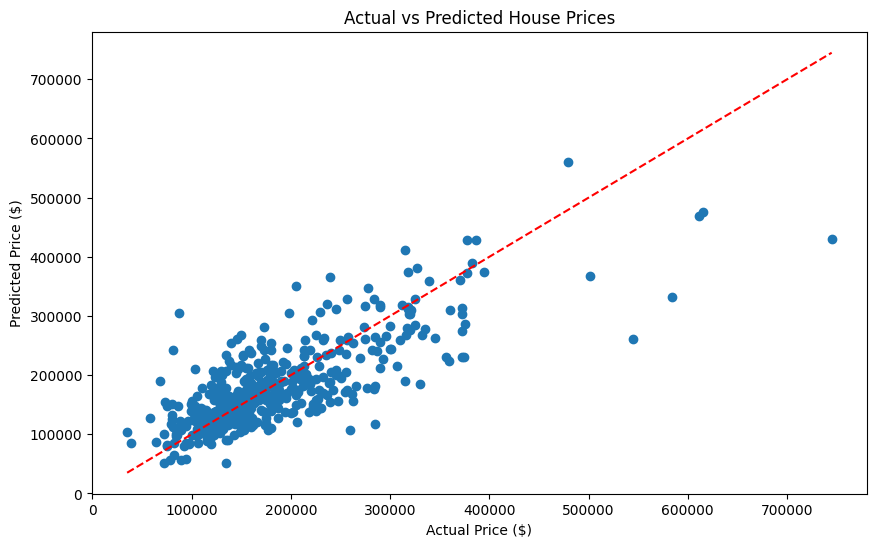

In [34]:
# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Create RFE object with 11 features to select
rfe = RFE(estimator=rf_regressor)

# Fit the RFE model using scaled data
rfe.fit(X_train_scaled, y_train)

# Create a new Random Forest Regressor model using only the selected features
new_rf_model = RandomForestRegressor(n_estimators=100)

# Fit the new model on the selected features
X_train_selected_scaled = X_train_scaled[:, rfe.support_]
new_rf_model.fit(X_train_selected_scaled, y_train)

# Evaluate our new model:
# Make predictions on the test set
X_test_selected_scaled = X_test_scaled[:, rfe.support_]
y_pred = new_rf_model.predict(X_test_selected_scaled)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"RMSE of RFE-selected Random Forest Model: ${rmse:.2f}")

# Calculate RMSPE
rmspe = np.sqrt(np.mean((y_pred - y_test) / y_test)**2) * 100
print(f"Root Mean Squared Percentage Error (RMSPE): {rmspe:.2f}%")

# Calculate R-squared
r2 = new_rf_model.score(X_test_selected_scaled, y_test)
print(f"R-squared: {r2:.4f}")

# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Actual vs Predicted House Prices')
plt.show()

### 5c. RFECV Modeling



Selected features by RFECV: Index(['Garage Cars', 'Garage Area', 'Total Bsmt SF', 'Garage Yr Blt',
       'Mas Vnr Area'],
      dtype='object')

Optimal number of features: 5


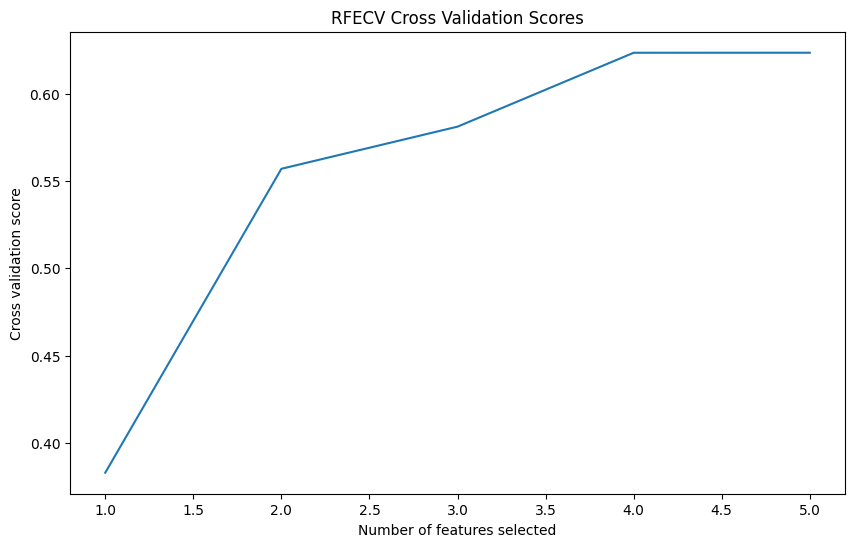

RMSE of RFECV-selected Linear Regression Model: $48960.42
Root Mean Squared Percentage Error (RMSPE): 3.38%
R-squared: 0.6528


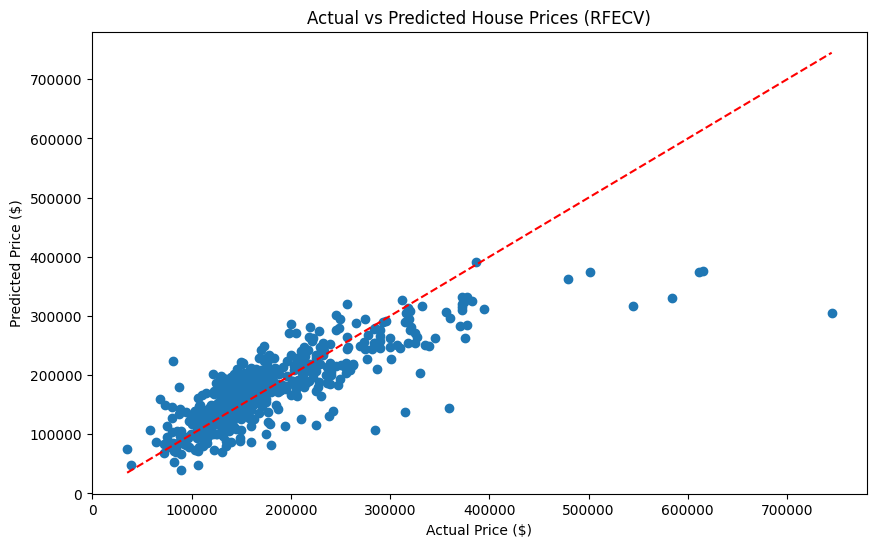

In [35]:
# Create a linear regression model
model = LinearRegression()

# Create an RFECV object
rfecv = RFECV(estimator=model, step=1, cv=5)

# Fit the RFECV object
rfecv.fit(X_train_scaled, y_train)

# Get the selected features
selected_features_rfecv = corr_features.columns[rfecv.support_]
print("\nSelected features by RFECV:", selected_features_rfecv)

# Print the optimal number of features
print(f"\nOptimal number of features: {rfecv.n_features_}")

# Plot the cross-validation scores
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.title("RFECV Cross Validation Scores")
plt.show()

# Transform the data using the selected features
X_train_selected_scaled = rfecv.transform(X_train_scaled)
X_test_selected_scaled = rfecv.transform(X_test_scaled)

# Create and fit a new model using the selected features
new_model = LinearRegression()
new_model.fit(X_train_selected_scaled, y_train)

# Evaluate the new model
y_pred = new_model.predict(X_test_selected_scaled)

# Calculate metrics
mse = np.mean((y_pred - y_test)**2)
rmse = np.sqrt(mse)
rmspe = np.sqrt(np.mean((y_pred - y_test) / y_test)**2) * 100
r2 = new_model.score(X_test_selected_scaled, y_test)

print(f"RMSE of RFECV-selected Linear Regression Model: ${rmse:.2f}")
print(f"Root Mean Squared Percentage Error (RMSPE): {rmspe:.2f}%")
print(f"R-squared: {r2:.4f}")

# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Actual vs Predicted House Prices (RFECV)')
plt.show()

## 6. Processing


## 7. Data Visualization/Communication of Results


# Sources and Credits:
The dataset for this project is hosted by AWS, and can be found [here](https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv).

Major thanks to Robert Balch II, and my classmates. His repository containing the code that I heavily referenced can be found [here](https://github.com/RSBalchII/cohort-15-data-science/tree/main/Colab-Notebooks/Module-2/project-2).